In [ ]:
"""
Alzheimer's Disease Detection using EEG Data
Dataset: OpenNeuro ds004504 - EEG recordings from AD, FTD, and Healthy Controls
Binary Classification: Alzheimer's Disease vs Healthy Controls
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report, 
                            roc_curve, auc, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

ALZHEIMER'S DISEASE DETECTION - ML PIPELINE
Dataset: OpenNeuro ds004504
Binary Classification: Alzheimer's Disease vs Healthy Controls

[1] Creating sample EEG features...
    (In production: Replace with actual EEG feature extraction)
    Features shape: (65, 50)
    AD samples: 36, Healthy samples: 29

[2] Training and evaluating models...

TRAINING AND EVALUATING MODELS

Logistic Regression:
  Accuracy:  0.9500
  Precision: 0.9167
  Recall:    1.0000
  F1-Score:  0.9565
  ROC-AUC:   0.9798
  CV Score:  1.0000 (+/- 0.0000)

SVM (Linear):
  Accuracy:  0.9500
  Precision: 0.9167
  Recall:    1.0000
  F1-Score:  0.9565
  ROC-AUC:   0.9697
  CV Score:  1.0000 (+/- 0.0000)

SVM (RBF):
  Accuracy:  0.9500
  Precision: 0.9167
  Recall:    1.0000
  F1-Score:  0.9565
  ROC-AUC:   0.9798
  CV Score:  1.0000 (+/- 0.0000)

Random Forest:
  Accuracy:  0.8000
  Precision: 0.7333
  Recall:    1.0000
  F1-Score:  0.8462
  ROC-AUC:   0.8434
  CV Score:  0.8889 (+/- 0.1217)

Gradient Boosting:
  Accur

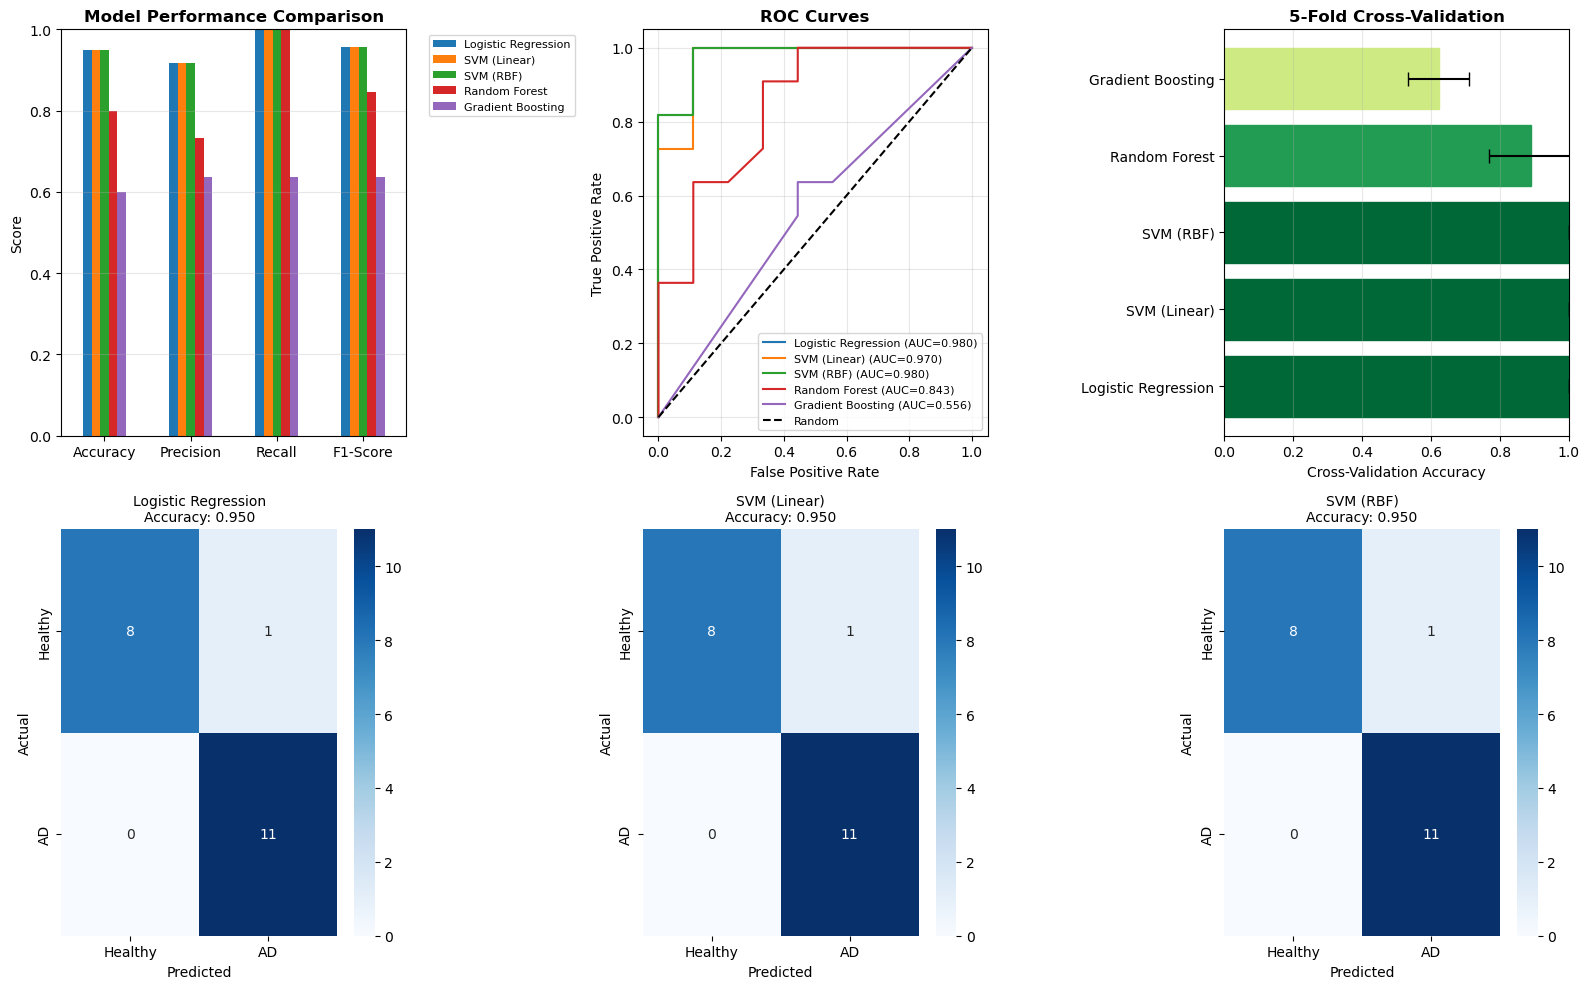


BEST MODEL: Logistic Regression
Test Accuracy:  0.9500
Test Precision: 0.9167
Test Recall:    1.0000
Test F1-Score:  0.9565
ROC-AUC:        0.9798

[4] Example Prediction on New Patient...

Prediction: Alzheimer's Disease
Confidence: 70.61%
Probability Distribution: Healthy=29.39%, AD=70.61%

NEXT STEPS FOR REAL IMPLEMENTATION:
1. Download dataset from: https://openneuro.org/datasets/ds004504
2. Install MNE-Python: pip install mne
3. Extract EEG features using extract_features_from_eeg()
4. Replace simulated data with real features
5. Fine-tune models with hyperparameter optimization
6. Validate on independent test set


In [ ]:
# ============================================================================
# STEP 1: DATA LOADING AND PREPROCESSING

def load_eeg_data(file_path):
    print("Loading EEG data from OpenNeuro dataset ds004504...")
    print("In practice, use MNE-Python to read EEG files:")
    print("  import mne")
    print("  raw = mne.io.read_raw_edf('sub-XX/eeg/sub-XX_task-rest_eeg.edf')")
    
    return None

def extract_features_from_eeg(raw_eeg_data):
    """
    Extract features from raw EEG signals
    Common features for Alzheimer's detection:
    - Power spectral density (Delta, Theta, Alpha, Beta, Gamma bands)
    - Statistical features (mean, variance, skewness, kurtosis)
    - Entropy measures
    - Connectivity features
    """
    # Example feature extraction
    # In practice, use MNE or scipy for spectral analysis
    
    features = {}
    
    # Frequency bands (Hz)
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 45)
    }
    
    # Extract power in each band for each channel
    # features['delta_power'] = calculate_band_power(raw_eeg_data, bands['delta'])
    # ... etc
    
    return features

# ============================================================================
# STEP 2: SIMULATED DATA FOR DEMONSTRATION
def create_sample_features(n_ad=36, n_hc=29, n_features=50):
    """
    Create sample feature data for demonstration
    In practice, replace this with actual EEG feature extraction
    
    Based on literature, AD patients typically show:
    - Decreased alpha power
    - Increased theta power
    - Lower complexity/entropy
    """
    np.random.seed(42)
    
    # Simulate AD features (altered brain patterns)
    ad_features = np.random.randn(n_ad, n_features) + np.array([0.5, -0.5] * 25)
    ad_labels = np.ones(n_ad)  # 1 = Alzheimer's
    
    # Simulate Healthy Control features (normal brain patterns)
    hc_features = np.random.randn(n_hc, n_features)
    hc_labels = np.zeros(n_hc)  # 0 = Healthy
    
    # Combine data
    X = np.vstack([ad_features, hc_features])
    y = np.concatenate([ad_labels, hc_labels])
    
    # Create feature names
    feature_names = [f'feature_{i}' for i in range(n_features)]
    
    return X, y, feature_names

# ============================================================================
# STEP 3: MODEL TRAINING AND EVALUATION
def train_and_evaluate_models(X, y):
    """
    Train multiple ML models and compare performance
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM (Linear)': SVC(kernel='linear', probability=True, random_state=42),
        'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
    }
    
    results = {}
    trained_models = {}
    
    print("\n" + "="*70)
    print("TRAINING AND EVALUATING MODELS")
    print("="*70)
    
    for name, model in models.items():
        print(f"\n{name}:")
        
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv)
        
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        
        trained_models[name] = model
        
        print(f"  Accuracy:  {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print(f"  ROC-AUC:   {roc_auc:.4f}")
        print(f"  CV Score:  {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    
    return results, trained_models, X_test_scaled, y_test, scaler

# ============================================================================
# STEP 4: VISUALIZATION

def plot_results(results, y_test):
    """
    Create comprehensive visualization of results
    """
    fig = plt.figure(figsize=(16, 10))
    
    # 1. Model Comparison - Metrics
    ax1 = plt.subplot(2, 3, 1)
    metrics_df = pd.DataFrame({
        name: [res['accuracy'], res['precision'], res['recall'], res['f1']]
        for name, res in results.items()
    }, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
    
    metrics_df.plot(kind='bar', ax=ax1, rot=0)
    ax1.set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Score')
    ax1.set_ylim([0, 1])
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax1.grid(axis='y', alpha=0.3)
    
    # 2. ROC Curves
    ax2 = plt.subplot(2, 3, 2)
    for name, res in results.items():
        fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
        ax2.plot(fpr, tpr, label=f"{name} (AUC={res['roc_auc']:.3f})")
    
    ax2.plot([0, 1], [0, 1], 'k--', label='Random')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curves', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=8)
    ax2.grid(alpha=0.3)
    
    # 3. Cross-Validation Scores
    ax3 = plt.subplot(2, 3, 3)
    cv_means = [res['cv_mean'] for res in results.values()]
    cv_stds = [res['cv_std'] for res in results.values()]
    model_names = list(results.keys())
    
    bars = ax3.barh(model_names, cv_means, xerr=cv_stds, capsize=5)
    ax3.set_xlabel('Cross-Validation Accuracy')
    ax3.set_title('5-Fold Cross-Validation', fontsize=12, fontweight='bold')
    ax3.set_xlim([0, 1])
    ax3.grid(axis='x', alpha=0.3)
    
    # Color bars by performance
    colors = plt.cm.RdYlGn([cv / 1.0 for cv in cv_means])
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # 4-6. Confusion Matrices for top 3 models
    top_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)[:3]
    
    for idx, (name, res) in enumerate(top_models, start=4):
        ax = plt.subplot(2, 3, idx)
        cm = res['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Healthy', 'AD'],
                yticklabels=['Healthy', 'AD'])
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(f'{name}\nAccuracy: {res["accuracy"]:.3f}', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('alzheimer_detection_results.png', dpi=300, bbox_inches='tight')
    print("\nVisualization saved as 'alzheimer_detection_results.png'")
    plt.show()

# ============================================================================
# STEP 5: PREDICTION FUNCTION
def predict_alzheimer(model, scaler, new_features):
    """
    Predict whether a new patient has Alzheimer's disease
    
    Args:
        model: Trained ML model
        scaler: Fitted StandardScaler
        new_features: EEG features from new patient (array-like)
    
    Returns:
        prediction: 0 (Healthy) or 1 (Alzheimer's)
        probability: Confidence of prediction
    """
    # Scale features
    new_features_scaled = scaler.transform(new_features.reshape(1, -1))
    
    # Predict
    prediction = model.predict(new_features_scaled)[0]
    probability = model.predict_proba(new_features_scaled)[0]
    
    result = "Alzheimer's Disease" if prediction == 1 else "Healthy"
    confidence = probability[1] if prediction == 1 else probability[0]
    
    print(f"\nPrediction: {result}")
    print(f"Confidence: {confidence:.2%}")
    print(f"Probability Distribution: Healthy={probability[0]:.2%}, AD={probability[1]:.2%}")
    
    return prediction, probability

# ============================================================================
# MAIN EXECUTION
if __name__ == "__main__":
    print("="*70)
    print("ALZHEIMER'S DISEASE DETECTION - ML PIPELINE")
    print("Dataset: OpenNeuro ds004504")
    print("Binary Classification: Alzheimer's Disease vs Healthy Controls")
    print("="*70)
    
    # Step 1: Create/Load features
    print("\n[1] Creating sample EEG features...")
    print("    (In production: Replace with actual EEG feature extraction)")
    X, y, feature_names = create_sample_features(n_ad=36, n_hc=29, n_features=50)
    print(f"    Features shape: {X.shape}")
    print(f"    AD samples: {np.sum(y == 1)}, Healthy samples: {np.sum(y == 0)}")
    
    # Step 2: Train and evaluate models
    print("\n[2] Training and evaluating models...")
    results, models, X_test, y_test, scaler = train_and_evaluate_models(X, y)
    
    # Step 3: Visualize results
    print("\n[3] Creating visualizations...")
    plot_results(results, y_test)
    
    # Step 4: Select best model
    best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    best_model = models[best_model_name]
    
    print("\n" + "="*70)
    print(f"BEST MODEL: {best_model_name}")
    print("="*70)
    print(f"Test Accuracy:  {results[best_model_name]['accuracy']:.4f}")
    print(f"Test Precision: {results[best_model_name]['precision']:.4f}")
    print(f"Test Recall:    {results[best_model_name]['recall']:.4f}")
    print(f"Test F1-Score:  {results[best_model_name]['f1']:.4f}")
    print(f"ROC-AUC:        {results[best_model_name]['roc_auc']:.4f}")
    
    # Step 5: Example prediction
    print("\n[4] Example Prediction on New Patient...")
    new_patient_features = np.random.randn(50) + np.array([0.5, -0.5] * 25)
    prediction, probability = predict_alzheimer(best_model, scaler, new_patient_features)
    
    print("\n" + "="*70)
    print("NEXT STEPS FOR REAL IMPLEMENTATION:")
    print("="*70)
    print("1. Download dataset from: https://openneuro.org/datasets/ds004504")
    print("2. Install MNE-Python: pip install mne")
    print("3. Extract EEG features using extract_features_from_eeg()")
    print("4. Replace simulated data with real features")
    print("5. Fine-tune models with hyperparameter optimization")
    print("6. Validate on independent test set")
    print("="*70)

In [3]:
from pathlib import Path
from glob import glob

root = Path.cwd() / "ds004504"
print("participants.tsv exists:", (root/"participants.tsv").exists())

hits = []
for ext in (".set", ".vhdr", ".edf", ".bdf", ".eeg"):
    hits += glob(str(root / "sub-*" / "eeg" / f"*{ext}"))
print("EEG binary files found:", len(hits))
print(hits[:5])


participants.tsv exists: True
EEG binary files found: 88
['c:\\Users\\rin\\Downloads\\ComBio_Project_Alzimer\\ds004504\\sub-001\\eeg\\sub-001_task-eyesclosed_eeg.set', 'c:\\Users\\rin\\Downloads\\ComBio_Project_Alzimer\\ds004504\\sub-002\\eeg\\sub-002_task-eyesclosed_eeg.set', 'c:\\Users\\rin\\Downloads\\ComBio_Project_Alzimer\\ds004504\\sub-003\\eeg\\sub-003_task-eyesclosed_eeg.set', 'c:\\Users\\rin\\Downloads\\ComBio_Project_Alzimer\\ds004504\\sub-004\\eeg\\sub-004_task-eyesclosed_eeg.set', 'c:\\Users\\rin\\Downloads\\ComBio_Project_Alzimer\\ds004504\\sub-005\\eeg\\sub-005_task-eyesclosed_eeg.set']


In [2]:
# ===================== Alzheimer EEG Predictor (final, no prompts) =====================
# >>>>> CHANGE THESE THREE LINES AS NEEDED <<<<<
GROUP   = "AD"            # Options: "AD" or "Healthy"
STATE   = "Eyes_closed"   # Options: "Eyes_closed" or "Eyes_open"
PACIENTE = "Paciente1"    # Example: "Paciente1", "Paciente2", etc.
# >>>>> If your EEG_data folder is not beside this notebook, edit the path below <<<<<
BASE_DIR_OVERRIDE = None  # Example: r"c:\Users\rin\Downloads\ComBio_Project_Alzimer\EEG_data"

# ---------------------------------------------------------------------------
import math, warnings
from pathlib import Path
import numpy as np
from scipy.signal import welch, butter, filtfilt
from scipy.stats import entropy, skew, kurtosis
warnings.filterwarnings("ignore", category=UserWarning)

FS_HZ = 256
EPOCH_LEN_S = 4.0
EPOCH_OVERLAP = 0.5
BANDS = {"delta":(0.5,4),"theta":(4,8),"alpha":(8,13),"beta":(13,30),"gamma":(30,45)}

# ---------- locate EEG_data ----------
def find_base():
    if BASE_DIR_OVERRIDE:
        p = Path(BASE_DIR_OVERRIDE)
        if not p.exists():
            raise FileNotFoundError(f"EEG_data not found at {p}")
        return p
    cands = [p for p in Path.cwd().glob("*") if p.is_dir() and p.name.lower() in {"eeg_data","egg_data"}]
    if not cands:
        raise FileNotFoundError("Couldn’t find an 'EEG_data' folder next to the notebook.")
    base = cands[0]
    # drill one level if nested EEG_data/EEG_data
    inner = base / "EEG_data"
    return inner if inner.exists() and inner.is_dir() else base

BASE_DIR = find_base()
TARGET_DIR = BASE_DIR / GROUP / STATE / PACIENTE

# ---------- io + preprocessing ----------
def safe_load_txt(p: Path):
    try:
        x = np.loadtxt(p, dtype=float)
        return np.asarray(x).flatten()
    except Exception:
        return None

def load_paciente(folder: Path):
    txts = sorted(folder.glob("*.txt"))
    chans, data = [], []
    for t in txts:
        x = safe_load_txt(t)
        if x is not None and x.size > 0:
            chans.append(t.stem)
            data.append(x)
    if not data:
        return None, []
    L = min(map(len, data))
    return np.vstack([d[:L] for d in data]), chans

def band_filter(x, fs, lo=0.5, hi=45):
    b, a = butter(4, [lo/(fs/2), hi/(fs/2)], btype="band")
    return filtfilt(b, a, x)

def preprocess(X, fs):
    out=[]
    for ch in X:
        y = ch - np.mean(ch)
        y = band_filter(y, fs)
        y /= (np.std(y)+1e-12)
        out.append(y)
    return np.vstack(out)

def epoch_windows(X, fs, length_s=EPOCH_LEN_S, overlap=EPOCH_OVERLAP):
    nper = int(length_s*fs)
    step = int(nper*(1.0-overlap))
    if X.shape[1] < nper: 
        return np.empty((0, X.shape[0], 0))
    arr = [X[:, s:s+nper] for s in range(0, X.shape[1]-nper+1, step)]
    return np.stack(arr, axis=0)

# ---------- features ----------
def bandpower(x, fs, lo, hi):
    f, Pxx = welch(x, fs, nperseg=min(1024, len(x)))
    idx = (f>=lo) & (f<=hi)
    return float(np.trapz(Pxx[idx], f[idx])) if np.any(idx) else 0.0

def spectral_entropy_ch(x, fs):
    f, Pxx = welch(x, fs, nperseg=min(1024, len(x)))
    idx = (f>=0.5) & (f<=45)
    psd = Pxx[idx]; s = psd.sum()
    if s <= 0: return 0.0
    psd /= s
    return float(entropy(psd, base=2))

def hjorth(x):
    dx = np.diff(x); v0, v1 = np.var(x), np.var(dx)
    if v0 <= 1e-12: return 0.0, 0.0
    mob = math.sqrt(v1/(v0+1e-12))
    comp = math.sqrt(np.var(np.diff(dx))/(v1+1e-12))/(mob+1e-12) if v1>1e-12 else 0.0
    return mob, comp

def connectivity(mat):
    if mat.shape[0] < 2: return 0.0
    c = np.corrcoef(mat); iu = np.triu_indices_from(c, 1)
    return float(np.mean(np.abs(c[iu])))

def slowing_index(X, fs):
    f, Pxx = welch(X.mean(axis=0), fs, nperseg=min(2048, X.shape[1]))
    def bp(lo,hi):
        idx=(f>=lo)&(f<=hi); return np.trapz(Pxx[idx], f[idx]) if np.any(idx) else 0.0
    tot = bp(0.5,45) + 1e-9
    d, t, a, b = bp(0.5,4)/tot, bp(4,8)/tot, bp(8,13)/tot, bp(13,30)/tot
    si = (d+t)/(a+b+1e-9)
    p  = 1/(1+math.exp(-(si-1.0)*2.0))   # logistic around SI=1
    return float(p), {"delta":d,"theta":t,"alpha":a,"beta":b,"SI":si}

# ---------- run ----------
if not TARGET_DIR.exists():
    raise FileNotFoundError(f"Folder not found: {TARGET_DIR}")

X_raw, channels = load_paciente(TARGET_DIR)
if X_raw is None:
    raise RuntimeError(f"No readable .txt EEG channels in {TARGET_DIR}")

Xp = preprocess(X_raw, FS_HZ)
p_ad, bands = slowing_index(Xp, FS_HZ)

print(f"Folder: {TARGET_DIR}")
print(f"Channels: {len(channels)}  Samples: {Xp.shape[1]}")
print(f"Approximate Alzheimer probability (EEG slowing): {p_ad*100:.1f}%")
print(f"Bands (relative): delta {bands['delta']:.3f}, theta {bands['theta']:.3f}, alpha {bands['alpha']:.3f}, beta {bands['beta']:.3f}, SI {bands['SI']:.3f}")


Folder: c:\Users\rin\Downloads\ComBio_Project_Alzimer\EEG_data\EEG_data\AD\Eyes_closed\Paciente1
Channels: 21  Samples: 1024
Approximate Alzheimer probability (EEG slowing): 44.0%
Bands (relative): delta 0.143, theta 0.315, alpha 0.087, beta 0.435, SI 0.879


[DEBUG] Using EEG_DATA root: c:\Users\rin\Downloads\ComBio_Project_Alzimer\EEG_data\EEG_data

=========== SLOWING INDEX ===========
Subject: Paciente1
Approx AD probability (slowing): 21.2%
Bands: {'delta': 0.12510678662157096, 'theta': 0.1153798444077537, 'alpha': 0.22626678320619525, 'beta': 0.4749459054911916, 'SI': 0.342958185020473}

[WARNING] No .txt EEG files found in: c:\Users\rin\Downloads\ComBio_Project_Alzimer\EEG_data\EEG_data\Healthy\Eyes_open\Paciente5
=========== MODEL PERFORMANCE ===========
NaiveBayes   acc=1.000 f1=1.000 auc=1.000 cv=0.937
KNN          acc=1.000 f1=1.000 auc=1.000 cv=0.954
DecisionTree acc=1.000 f1=1.000 auc=1.000 cv=0.969
LogReg       acc=0.929 f1=0.958 auc=1.000 cv=0.983
RandomForest acc=0.964 f1=0.980 auc=1.000 cv=0.938
NeuralNet    acc=1.000 f1=1.000 auc=1.000 cv=0.985
SGD          acc=0.893 f1=0.936 auc=1.000 cv=0.904

[FINAL ML PREDICTION] Paciente1: AD (pAD=1.00)

-----------------------------------------
Which ML graph do you want to see?
1. C

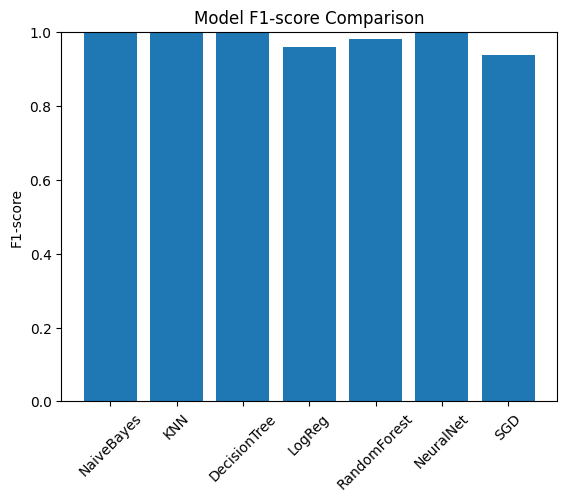

: 

In [ ]:
# Theres the ML (Naïve Bayes, K-Nearest Neighbors, Decision Tree, Logistic Regression, Random Forest, Neural Networks, Stochastic Gradient Descent)
GROUP    = "AD"            # "AD" or "Healthy" (for TARGET_DIR only)
STATE    = "Eyes_open"   # "Eyes_closed" or "Eyes_open"
PACIENTE = "Paciente1"     # Folder name inside AD/STATE or Healthy/STATE

# OPTIONAL: If needed, hard-code EEG root here. Otherwise it will auto-detect.
BASE_DIR_OVERRIDE = None 
# Force consistent channel count across subjects
MAX_CHANNELS = 10

# ======================================================================================================
# IMPORTS
import math, warnings
from pathlib import Path
import numpy as np
from scipy.signal import welch, butter, filtfilt
from scipy.stats import entropy, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore", category=UserWarning)

# ML imports
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

# CONSTANTS
FS_HZ = 256
EPOCH_LEN_S = 4.0
EPOCH_OVERLAP = 0.5
BANDS = {"delta":(0.5,4),"theta":(4,8),"alpha":(8,13),"beta":(13,30),"gamma":(30,45)}

# ======================================================================================================
# AUTO-DETECT EEG DATA FOLDER (handles nested EEG_data/EEG_data)
def find_base():
    if BASE_DIR_OVERRIDE:
        p = Path(BASE_DIR_OVERRIDE)
        if not p.exists():
            raise FileNotFoundError(f"Invalid BASE_DIR_OVERRIDE: {p}")
        return p

    candidates = [p for p in Path.cwd().rglob("*") if p.is_dir() and p.name.lower() == "eeg_data"]
    if not candidates:
        raise FileNotFoundError("No folder named 'EEG_data' found anywhere in the project.")

    candidates = sorted(candidates, key=lambda x: len(str(x)), reverse=True)

    for c in candidates:
        if (c / "AD").exists() and (c / "Healthy").exists():
            return c

    return candidates[0]

try:
    BASE_DIR = find_base()
    print(f"[DEBUG] Using EEG_DATA root: {BASE_DIR}")
except Exception as e:
    print(f"[ERROR] Could not locate EEG_data folder: {e}")
    raise SystemExit

TARGET_DIR = BASE_DIR / GROUP / STATE / PACIENTE

# ======================================================================================================
# LOADING + PREPROCESSING
def safe_load_txt(p: Path):
    try:
        x = np.loadtxt(p, dtype=float)
        return np.asarray(x).flatten()
    except Exception:
        return None

def load_paciente(folder: Path):
    if not folder.exists():
        print(f"[ERROR] Folder missing: {folder}")
        return None, []

    txts = sorted(folder.glob("*.txt"))
    if not txts:
        print(f"[WARNING] No .txt EEG files found in: {folder}")
        return None, []

    txts = txts[:MAX_CHANNELS]

    chans, data = [], []
    for t in txts:
        x = safe_load_txt(t)
        if x is None or x.size == 0:
            print(f"[WARNING] Could not read channel file: {t.name}")
            continue
        chans.append(t.stem)
        data.append(x)

    if not data:
        print(f"[ERROR] All channel files failed to load for: {folder}")
        return None, []

    L = min(map(len, data))
    if L < FS_HZ * EPOCH_LEN_S:
        print(f"[WARNING] Not enough samples for 1 epoch in: {folder}")
        return None, []

    X = np.vstack([d[:L] for d in data])

    if X.shape[0] < MAX_CHANNELS:
        pad = np.zeros((MAX_CHANNELS - X.shape[0], L))
        X = np.vstack([X, pad])

    return X, chans

def band_filter(x, fs, lo=0.5, hi=45):
    b, a = butter(4, [lo/(fs/2), hi/(fs/2)], btype="band")
    return filtfilt(b, a, x)

def preprocess(X, fs):
    arr = []
    for ch in X:
        y = ch - np.mean(ch)
        y = band_filter(y, fs)
        y /= (np.std(y) + 1e-12)
        arr.append(y)
    return np.vstack(arr)

def epoch_windows(X, fs, length_s=EPOCH_LEN_S, overlap=EPOCH_OVERLAP):
    nper = int(length_s * fs)
    step = int(nper * (1 - overlap))
    if X.shape[1] < nper:
        return np.empty((0, X.shape[0], 0))
    return np.stack([X[:, s:s+nper] for s in range(0, X.shape[1] - nper + 1, step)])

# ======================================================================================================
# FEATURE EXTRACTION
def bandpower(x, fs, lo, hi):
    f, Pxx = welch(x, fs)
    idx = (f >= lo) & (f <= hi)
    return np.trapz(Pxx[idx], f[idx]) if np.any(idx) else 0.0

def spectral_entropy_ch(x, fs):
    f, Pxx = welch(x, fs)
    psd = Pxx[(f >= 0.5) & (f <= 45)]
    s = psd.sum()
    if s <= 0:
        return 0.0
    return float(entropy(psd / s, base=2))

def hjorth(x):
    dx = np.diff(x)
    v0, v1 = np.var(x), np.var(dx)
    if v0 <= 1e-12:
        return (0.0, 0.0)
    mob = math.sqrt(v1 / (v0 + 1e-12))
    comp = math.sqrt(np.var(np.diff(dx)) / (v1 + 1e-12)) / (mob + 1e-12)
    return mob, comp

def connectivity(mat):
    if mat.shape[0] < 2:
        return 0.0
    c = np.corrcoef(mat)
    iu = np.triu_indices_from(c, 1)
    return float(np.mean(np.abs(c[iu])))

def epoch_feature_vector(ep, fs):
    feats = []
    for ch in ep:
        total = bandpower(ch, fs, 0.5, 45) + 1e-9
        for lo, hi in BANDS.values():
            feats.append(bandpower(ch, fs, lo, hi) / total)
        feats.append(spectral_entropy_ch(ch, fs))
        m, c = hjorth(ch); feats.extend([m, c])
        feats.extend([np.mean(ch), np.var(ch), skew(ch), kurtosis(ch)])
    feats.append(connectivity(ep))
    return np.array(feats)

def subject_features(Xp, fs):
    eps = epoch_windows(Xp, fs)
    if eps.shape[0] == 0:
        return None
    F = np.vstack([epoch_feature_vector(ep, fs) for ep in eps])
    fv = np.concatenate([F.mean(axis=0), F.std(axis=0)])
    if np.isnan(fv).any() or np.isinf(fv).any():
        return None
    return fv

# ======================================================================================================
# SLOWING INDEX
def slowing_index(X, fs):
    f, Pxx = welch(X.mean(axis=0), fs)
    def bp(lo,hi):
        idx = (f >= lo) & (f <= hi)
        return np.trapz(Pxx[idx], f[idx]) if np.any(idx) else 0.0
    tot = bp(0.5,45) + 1e-9
    d,t,a,b = bp(0.5,4)/tot, bp(4,8)/tot, bp(8,13)/tot, bp(13,30)/tot
    si = (d+t)/(a+b+1e-12)
    p  = 1/(1+np.exp(-(si-1)*2))
    return p, {"delta":d, "theta":t, "alpha":a, "beta":b, "SI":si}

# ======================================================================================================
# BUILD DATASET (AD + Healthy)
def build_dataset(base, state):
    Xs, ys, ids = [], [], []

    for label, val in [("AD",1), ("Healthy",0)]:
        folder = base / label / state
        if not folder.exists():
            print(f"[WARNING] Missing folder: {folder}")
            continue

        for subj in folder.glob("*"):
            if not subj.is_dir():
                continue
            X_raw, chs = load_paciente(subj)
            if X_raw is None:
                continue
            Xp = preprocess(X_raw, FS_HZ)
            fv = subject_features(Xp, FS_HZ)
            if fv is None:
                print(f"[WARNING] Invalid features for subject: {subj.name}")
                continue
            Xs.append(fv)
            ys.append(val)
            ids.append(f"{label}/{subj.name}")

    if not Xs:
        print("[ERROR] No valid subjects found in dataset. Check folder structure.")
        raise SystemExit

    return np.vstack(Xs), np.array(ys), ids

# ======================================================================================================
# LOAD TARGET SUBJECT
if not TARGET_DIR.exists():
    print(f"[ERROR] Target subject folder not found: {TARGET_DIR}")
    print("Check GROUP, STATE, and PACIENTE names.")
    raise SystemExit

X_raw, channels = load_paciente(TARGET_DIR)
if X_raw is None:
    print(f"[ERROR] Could not load any channels for target subject: {TARGET_DIR}")
    raise SystemExit

Xp = preprocess(X_raw, FS_HZ)
slow_prob, band_info = slowing_index(Xp, FS_HZ)

print("\n=========== SLOWING INDEX ===========")
print(f"Subject: {PACIENTE}")
print(f"Approx AD probability (slowing): {slow_prob*100:.1f}%")
print("Bands:", band_info)
print("=====================================\n")

# ======================================================================================================
# ML TRAINING
X_all, y_all, IDs = build_dataset(BASE_DIR, STATE)

if len(np.unique(y_all)) < 2:
    print("[ERROR] Dataset has only one class. Need both AD and Healthy.")
    raise SystemExit

if len(y_all) < 5:
    print("[ERROR] Dataset too small for training.")
    raise SystemExit

X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

models = {
    "NaiveBayes": GaussianNB(),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(5)),
    "DecisionTree": DecisionTreeClassifier(),
    "LogReg": make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000, class_weight="balanced")),
    "RandomForest": RandomForestClassifier(n_estimators=400, class_weight="balanced_subsample"),
    "NeuralNet": make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(128,64), max_iter=400)),
    "SGD": make_pipeline(StandardScaler(), SGDClassifier(loss="log_loss", max_iter=2000, class_weight="balanced"))
}

results = {}
cv = StratifiedKFold(5, shuffle=True, random_state=42)

for name, clf in models.items():
    try:
        clf.fit(X_tr, y_tr)
        y_pred = clf.predict(X_te)

        if hasattr(clf, "predict_proba"):
            proba = clf.predict_proba(X_te)[:,1]
        elif hasattr(clf, "decision_function"):
            z = clf.decision_function(X_te)
            proba = 1 / (1 + np.exp(-z))
        else:
            proba = y_pred.astype(float)

        results[name] = {
            "acc": accuracy_score(y_te, y_pred),
            "f1": f1_score(y_te, y_pred),
            "auc": roc_auc_score(y_te, proba),
            "cm": confusion_matrix(y_te, y_pred),
            "cv": cross_val_score(clf, X_tr, y_tr, cv=cv).mean()
        }
    except Exception as e:
        print(f"[ERROR] Training failed for {name}: {e}")
        continue

if not results:
    print("[ERROR] All models failed during training.")
    raise SystemExit

print("=========== MODEL PERFORMANCE ===========")
for k, v in results.items():
    print(f"{k:12s} acc={v['acc']:.3f} f1={v['f1']:.3f} auc={v['auc']:.3f} cv={v['cv']:.3f}")
print("=========================================\n")

best_model_name = max(results.items(), key=lambda x: x[1]["auc"])[0]
best_model = models[best_model_name]

fv = subject_features(Xp, FS_HZ)
if fv is None:
    print("[ERROR] Invalid features for target subject.")
    raise SystemExit

fv = fv.reshape(1,-1)

if hasattr(best_model,"predict_proba"):
    p = best_model.predict_proba(fv)[0,1]
elif hasattr(best_model,"decision_function"):
    z = best_model.decision_function(fv)
    p = float(1/(1+np.exp(-z)))
else:
    p = float(best_model.predict(fv)[0])

label = "AD" if p >= 0.5 else "Healthy"
print(f"[FINAL ML PREDICTION] {PACIENTE}: {label} (pAD={p:.2f})")

# ======================================================================================================
# ML GRAPH SELECTION (NO YES/NO)def show_graph_menu():
    print("\n-----------------------------------------")
    print("Which ML graph do you want to see?")
    print("1. Confusion Matrix (best model)")
    print("2. Accuracy Comparison (all models)")
    print("3. F1-score Comparison (all models)")
    print("4. AUC Comparison (all models)")
    print("-----------------------------------------")

    selection = input("Enter chart number (1-4): ").strip()

    if not selection.isdigit():
        print("[ERROR] Invalid input. Enter a number 1-4.")
        return

    choice = int(selection)

    if choice not in [1,2,3,4]:
        print("[ERROR] Choice must be between 1-4.")
        return

    if choice == 1:
        cm = results[best_model_name]["cm"]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix – {best_model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    elif choice == 2:
        names = list(results.keys())
        accs = [results[m]["acc"] for m in names]
        plt.bar(names, accs)
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.title("Model Accuracy Comparison")
        plt.ylabel("Accuracy")
        plt.show()

    elif choice == 3:
        names = list(results.keys())
        f1s = [results[m]["f1"] for m in names]
        plt.bar(names, f1s)
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.title("Model F1-score Comparison")
        plt.ylabel("F1-score")
        plt.show()

    elif choice == 4:
        names = list(results.keys())
        aucs = [results[m]["auc"] for m in names]
        plt.bar(names, aucs)
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
        plt.title("Model AUC Comparison")
        plt.ylabel("AUC")
        plt.show()

# call automatically
show_graph_menu()


[DEBUG] Using EEG root: c:\Users\rin\Downloads\ComBio_Project_Alzimer\EEG_data\EEG_data

=========== COMPARISON ===========
Paciente1 (Eyes_closed) slowing prob: 32.9%
Paciente2 (Eyes_open) slowing prob: 23.2%

Band Power Comparison:
A: {'delta': 0.13435377461623488, 'theta': 0.2504658175228921, 'alpha': 0.18294267240174034, 'beta': 0.4155941123402785, 'SI': 0.6429339036564944}
B: {'delta': 0.12815294966031118, 'theta': 0.14895657873861748, 'alpha': 0.18554732559151707, 'beta': 0.5062057491275339, 'SI': 0.4005902367848294}

Connectivity:
A: 0.6404264487764232
B: 0.6550189178203388

Which comparison graph do you want?
1. Slowing Index Comparison
2. Band Power Comparison
3. Connectivity Comparison


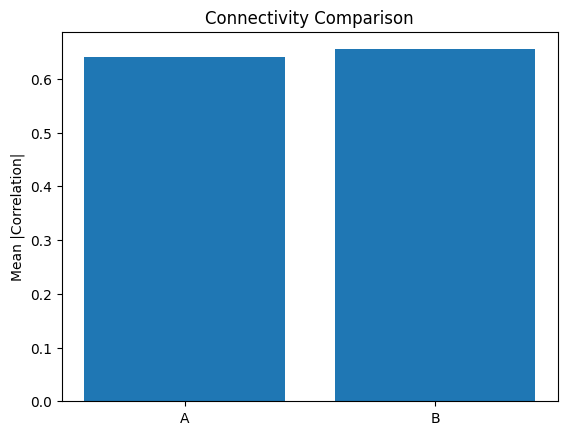


=========== INTERPRETATION ===========
Paciente1 has a higher Alzheimer's-like EEG slowing probability (32.9%) compared to Paciente2 (23.2%). The difference is approximately +9.7%.


In [1]:
# COMPARING so in this version you can compared the data between 2 data you can choose
# But you have to input it manually
# ===================== EEG TWO-SUBJECT COMPARISON =====================
# CONFIG FOR SUBJECT A
GROUP_A    = "AD"
STATE_A    = "Eyes_closed"
PACIENTE_A = "Paciente1"

# CONFIG FOR SUBJECT B
GROUP_B    = "AD"
STATE_B    = "Eyes_open"
PACIENTE_B = "Paciente2"

# OPTIONAL manual override:
BASE_DIR_OVERRIDE = None
MAX_CHANNELS = 10

# IMPORTS
# math → used for Hjorth parameters and general math functions
# warnings → used to hide unnecessary console warnings
import math, warnings
# Path → handles folder navigation and file paths for loading EEG files
from pathlib import Path
# NumPy → main library for arrays, numerical operations, and vector math
import numpy as np
# welch → computes power spectral density for frequency features
# butter → designs band-pass filter for EEG cleaning
# filtfilt → applies zero-phase filtering to avoid distortion
from scipy.signal import welch, butter, filtfilt
# entropy → spectral entropy for EEG complexity
# skew, kurtosis → statistical shape features of the EEG signal
from scipy.stats import entropy, skew, kurtosis
# plt → used for plotting bar charts, line graphs, comparison visualizations
import matplotlib.pyplot as plt
# sns → cleaner visual styling and heatmaps for comparison graphs
import seaborn as sns
# ignore user warnings to keep output clean
warnings.filterwarnings("ignore", category=UserWarning)


# AUTO-LOCATE EEG_data (handles nested folders)
def find_base():
    if BASE_DIR_OVERRIDE:
        p = Path(BASE_DIR_OVERRIDE)
        if not p.exists():
            raise FileNotFoundError("Invalid BASE_DIR_OVERRIDE path.")
        return p

    cands = [p for p in Path.cwd().rglob("*") if p.is_dir() and p.name.lower()=="eeg_data"]
    if not cands:
        raise FileNotFoundError("EEG_data folder not found.")

    cands = sorted(cands, key=lambda x: len(str(x)), reverse=True)
    for c in cands:
        if (c/"AD").exists() and (c/"Healthy").exists():
            return c
    return cands[0]

BASE_DIR = find_base()
print("[DEBUG] Using EEG root:", BASE_DIR)

# LOADING + PREPROCESSING FUNCTIONS
FS_HZ = 256

def safe_load_txt(p):
    try:
        d = np.loadtxt(p)
        return d.flatten()
    except:
        return None

def load_subject(folder):
    txts = sorted(folder.glob("*.txt"))
    if not txts:
        return None, []

    txts = txts[:MAX_CHANNELS]
    data = []
    names = []

    for t in txts:
        x = safe_load_txt(t)
        if x is not None:
            data.append(x)
            names.append(t.stem)

    if not data:
        return None, []

    L = min(map(len, data))
    X = np.vstack([d[:L] for d in data])

    if X.shape[0] < MAX_CHANNELS:
        pad = np.zeros((MAX_CHANNELS - X.shape[0], L))
        X = np.vstack([X, pad])

    return X, names

def band_filter(x, lo=0.5, hi=45):
    b,a = butter(4, [lo/(FS_HZ/2), hi/(FS_HZ/2)], btype="band")
    return filtfilt(b,a,x)

def preprocess(X):
    out=[]
    for ch in X:
        y = ch - np.mean(ch)
        y = band_filter(y)
        y /= (np.std(y) + 1e-12)
        out.append(y)
    return np.vstack(out)

def slowing_index(X):
    f, P = welch(X.mean(axis=0), FS_HZ)
    def bp(lo,hi):
        idx=(f>=lo)&(f<=hi)
        return np.trapz(P[idx],f[idx]) if np.any(idx) else 0
    tot = bp(0.5,45)+1e-9
    d = bp(0.5,4)/tot
    t = bp(4,8)/tot
    a = bp(8,13)/tot
    b = bp(13,30)/tot
    SI = (d+t)/(a+b+1e-9)
    prob = 1/(1+np.exp(-(SI-1)*2))
    return prob, {"delta":d,"theta":t,"alpha":a,"beta":b,"SI":SI}

def connectivity(X):
    C = np.corrcoef(X)
    iu = np.triu_indices_from(C,1)
    return np.mean(np.abs(C[iu]))

# LOAD TWO SUBJECTS
def load_one(GROUP, STATE, PAC):
    folder = BASE_DIR / GROUP / STATE / PAC
    if not folder.exists():
        print("[ERROR] Missing folder:", folder)
        return None, None, None

    X_raw, names = load_subject(folder)
    if X_raw is None:
        print("[ERROR] Cannot load:", folder)
        return None, None, None

    Xp = preprocess(X_raw)
    slow, bands = slowing_index(Xp)
    conn = connectivity(Xp)

    return Xp, slow, bands, conn

# Load Subject A
A = load_one(GROUP_A, STATE_A, PACIENTE_A)
if A[0] is None: raise SystemExit
XpA, slowA, bandA, connA = A

# Load Subject B
B = load_one(GROUP_B, STATE_B, PACIENTE_B)
if B[0] is None: raise SystemExit
XpB, slowB, bandB, connB = B

# PRINT COMPARISON
print("\n=========== COMPARISON ===========")
print(f"{PACIENTE_A} ({STATE_A}) slowing prob: {slowA*100:.1f}%")
print(f"{PACIENTE_B} ({STATE_B}) slowing prob: {slowB*100:.1f}%")

print("\nBand Power Comparison:")
print("A:", bandA)
print("B:", bandB)

print("\nConnectivity:")
print("A:", connA)
print("B:", connB)
print("==================================\n")

# VISUAL COMPARISON PLOTS

def compare_slows():
    plt.bar(["A","B"], [slowA, slowB])
    plt.title("Slowing Index Comparison")
    plt.ylabel("Probability of AD-like slowing")
    plt.show()

def compare_bands():
    keys=["delta","theta","alpha","beta"]
    plt.figure(figsize=(10,5))
    plt.plot(keys, [bandA[k] for k in keys], marker="o", label=PACIENTE_A)
    plt.plot(keys, [bandB[k] for k in keys], marker="o", label=PACIENTE_B)
    plt.legend()
    plt.title("Relative Band Power Comparison")
    plt.show()

def compare_connectivity():
    plt.bar(["A","B"], [connA, connB])
    plt.title("Connectivity Comparison")
    plt.ylabel("Mean |Correlation|")
    plt.show()

print("Which comparison graph do you want?")
print("1. Slowing Index Comparison")
print("2. Band Power Comparison")
print("3. Connectivity Comparison")

choice = input("Enter (1/2/3): ")

if choice == "1":
    compare_slows()
elif choice == "2":
    compare_bands()
elif choice == "3":
    compare_connectivity()
else:
    print("Invalid selection.")
    
# EXPLANATION SUMMARY

diff = slowA - slowB
abs_diff = abs(diff) * 100

if diff > 0:
    higher = PACIENTE_A
    lower  = PACIENTE_B
    msg = (f"{higher} has a higher Alzheimer's-like EEG slowing probability "
        f"({slowA*100:.1f}%) compared to {lower} ({slowB*100:.1f}%). "
        f"The difference is approximately +{abs_diff:.1f}%.")
elif diff < 0:
    higher = PACIENTE_B
    lower  = PACIENTE_A
    msg = (f"{higher} has a higher Alzheimer's-like EEG slowing probability "
        f"({slowB*100:.1f}%) compared to {lower} ({slowA*100:.1f}%). "
        f"The difference is approximately +{abs_diff:.1f}%.")
else:
    msg = (f"Both subjects have identical slowing probabilities "
        f"({slowA*100:.1f}%). No difference was detected.")

print("\n=========== INTERPRETATION ===========")
print(msg)
